___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

# WELCOME!

Welcome to "***Employee Churn Analysis Project***". This is the second project of Capstone Project Series, which you will be able to build your own classification models for a variety of business settings. 

Also you will learn what is Employee Churn?, How it is different from customer churn, Exploratory data analysis and visualization of employee churn dataset using ***matplotlib*** and ***seaborn***, model building and evaluation using python ***scikit-learn*** package. 

You will be able to implement classification techniques in Python. Using Scikit-Learn allowing you to successfully make predictions with the Random Forest, Gradient Descent Boosting , KNN algorithms.

At the end of the project, you will have the opportunity to deploy your model using *Streamlit*.

Before diving into the project, please take a look at the determines and project structure.

- NOTE: This project assumes that you already know the basics of coding in Python and are familiar with model deployement as well as the theory behind K-Means, Gradient Boosting , KNN, Random Forest, and Confusion Matrices. You can try more models and methods beside these to improve your model metrics.



# #Determines
In this project you have HR data of a company. A study is requested from you to predict which employee will churn by using this data.

The HR dataset has 14,999 samples. In the given dataset, you have two types of employee one who stayed and another who left the company.

You can describe 10 attributes in detail as:
- ***satisfaction_level:*** It is employee satisfaction point, which ranges from 0-1.
- ***last_evaluation:*** It is evaluated performance by the employer, which also ranges from 0-1.
- ***number_projects:*** How many of projects assigned to an employee?
- ***average_monthly_hours:*** How many hours in averega an employee worked in a month?
- **time_spent_company:** time_spent_company means employee experience. The number of years spent by an employee in the company.
- ***work_accident:*** Whether an employee has had a work accident or not.
- ***promotion_last_5years:*** Whether an employee has had a promotion in the last 5 years or not.
- ***Departments:*** Employee's working department/division.
- ***Salary:*** Salary level of the employee such as low, medium and high.
- ***left:*** Whether the employee has left the company or not.

First of all, to observe the structure of the data, outliers, missing values and features that affect the target variable, you must use exploratory data analysis and data visualization techniques. 

Then, you must perform data pre-processing operations such as ***Scaling*** and ***Label Encoding*** to increase the accuracy score of Gradient Descent Based or Distance-Based algorithms. you are asked to perform ***Cluster Analysis*** based on the information you obtain during exploratory data analysis and data visualization processes. 

The purpose of clustering analysis is to cluster data with similar characteristics. You are asked to use the ***K-means*** algorithm to make cluster analysis. However, you must provide the K-means algorithm with information about the number of clusters it will make predictions. Also, the data you apply to the K-means algorithm must be scaled. In order to find the optimal number of clusters, you are asked to use the ***Elbow method***. Briefly, try to predict the set to which individuals are related by using K-means and evaluate the estimation results.

Once the data is ready to be applied to the model, you must ***split the data into train and test***. Then build a model to predict whether employees will churn or not. Train your models with your train set, test the success of your model with your test set. 

Try to make your predictions by using the algorithms ***Gradient Boosting Classifier***, ***K Neighbors Classifier***, ***Random Forest Classifier***. You can use the related modules of the ***scikit-learn*** library. You can use scikit-learn ***Confusion Metrics*** module for accuracy calculation. You can use the ***Yellowbrick*** module for model selection and visualization.

In the final step, you will deploy your model using Streamlit tool.



# #Tasks

#### 1. Exploratory Data Analysis
- Importing Modules
- Loading Dataset
- Data Insigts

#### 2. Data Visualization
- Employees Left
- Determine Number of Projects
- Determine Time Spent in Company
- Subplots of Features

#### 3. Data Pre-Processing
- Split Data as Train and Test set
- Scaling
- Label Encoding

#### 4. Cluster Analysis
- Find the optimal number of clusters (k) using the elbow method for for K-means.
- Determine the clusters by using K-Means then Evaluate predicted results.

#### 5. Model Building
- Built Gradient Boosting Classifier, Evaluate Model Performance and Predict Test Data
- Built K Neighbors Classifier and Evaluate Model Performance and Predict Test Data
- Built Random Forest Classifier and Evaluate Model Performance and Predict Test Data

#### 6. Model Deployement

- Save and Export the Model as .pkl
- Save and Export Variables as .pkl 

## 1. Exploratory Data Analysis

Exploratory Data Analysis is an initial process of analysis, in which you can summarize characteristics of data such as pattern, trends, outliers, and hypothesis testing using descriptive statistics and visualization.

### Importing Modules

In [232]:
# Importing the libraries for EDA
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Importing plotly and cufflinks in offline mode
import plotly 
import plotly.express as px
import cufflinks as cf
import plotly.graph_objs as go
import plotly.offline as py
from plotly.offline import iplot
from plotly.subplots import make_subplots
import plotly.figure_factory as ff
cf.go_offline()
cf.set_config_file(offline=False, world_readable=True)

%matplotlib inline
# %matplotlib notebook
plt.rcParams["figure.figsize"] = (16, 10)
# plt.rcParams['figure.dpi'] = 100
sns.set_style("whitegrid")
import warnings

warnings.filterwarnings("ignore")
warnings.warn("this will not show")
pd.set_option('display.float_format', lambda x: '%.3f' % x)

import colorama
from colorama import Fore, Style  # makes strings colored
from termcolor import colored
from termcolor import cprint

### Loading Dataset

Let's first load the required HR dataset using pandas's "read_csv" function.

In [107]:
df0 = pd.read_csv("HR_Dataset.csv")
df = df0.copy()

### Data Insights

In the given dataset, you have two types of employee one who stayed and another who left the company. So, you can divide data into two groups and compare their characteristics. Here, you can find the average of both the groups using groupby() and mean() function.

In [108]:
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Departments,salary
0,0.380,0.530,2,157,3,0,1,0,sales,low
1,0.800,0.860,5,262,6,0,1,0,sales,medium
2,0.110,0.880,7,272,4,0,1,0,sales,medium
3,0.720,0.870,5,223,5,0,1,0,sales,low
4,0.370,0.520,2,159,3,0,1,0,sales,low


In [109]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Departments            14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [110]:
df.shape

(14999, 10)

In [111]:
df.isnull().sum().any()  # No missing values

False

In [112]:
df.duplicated().sum() 

3008

In [113]:
df.drop_duplicates(inplace=True)

In [114]:
df.shape #dropped

(11991, 10)

In [115]:
df.describe().T # summary statistics

,count,mean,std,min,25%,50%,75%,max
satisfaction_level,11991.000,0.630,0.241,0.090,0.480,0.660,0.820,1.000
last_evaluation,11991.000,0.717,0.168,0.360,0.570,0.720,0.860,1.000
number_project,11991.000,3.803,1.163,2.000,3.000,4.000,5.000,7.000
average_montly_hours,11991.000,200.474,48.728,96.000,157.000,200.000,243.000,310.000
time_spend_company,11991.000,3.365,1.330,2.000,3.000,3.000,4.000,10.000
Work_accident,11991.000,0.154,0.361,0.000,0.000,0.000,0.000,1.000
left,11991.000,0.166,0.372,0.000,0.000,0.000,0.000,1.000
promotion_last_5years,11991.000,0.017,0.129,0.000,0.000,0.000,0.000,1.000


In [116]:
!pip install sweetviz

                                             |                                             | [  0%]   00:00 ->…


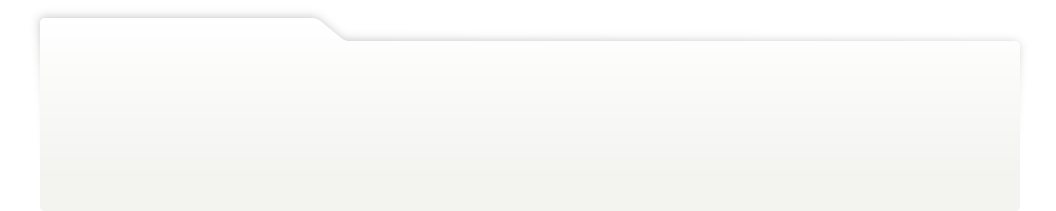
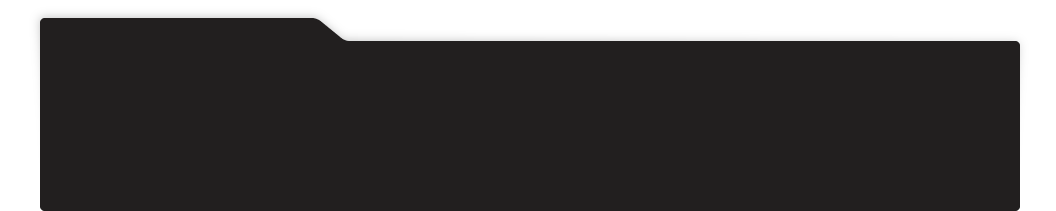
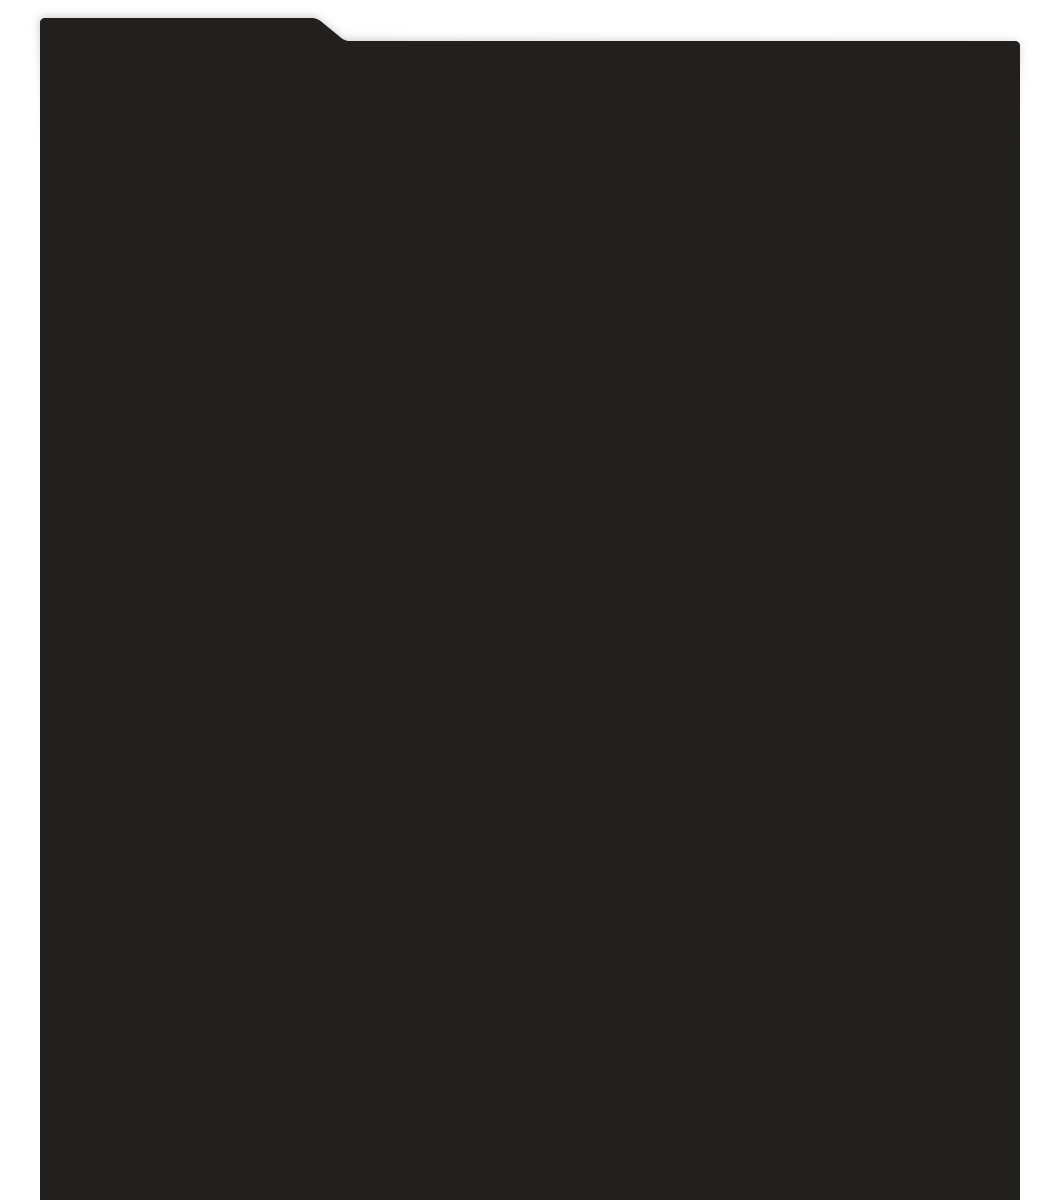
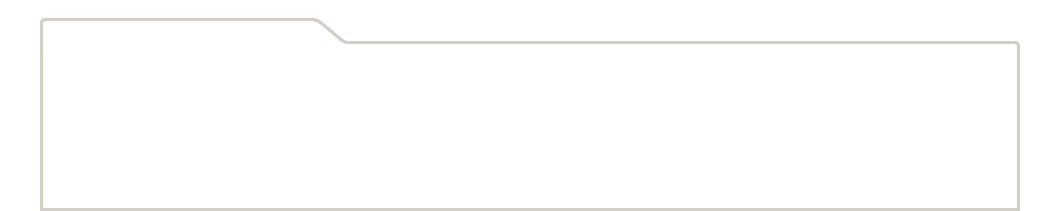
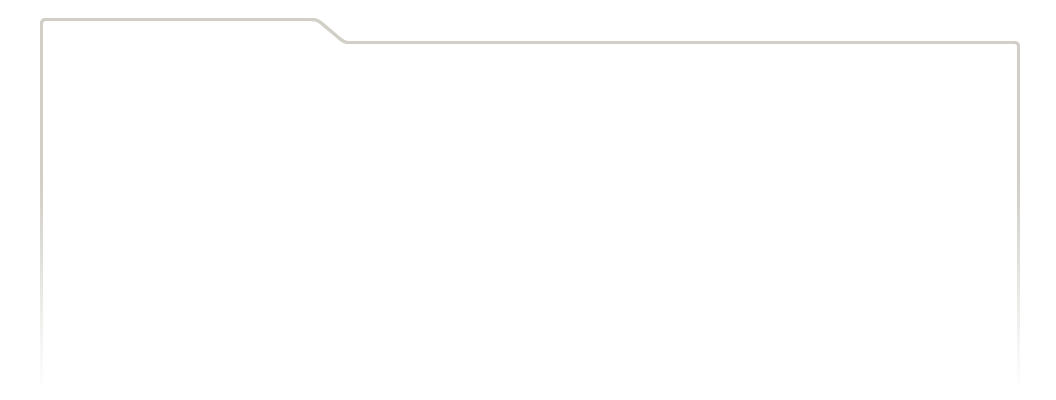
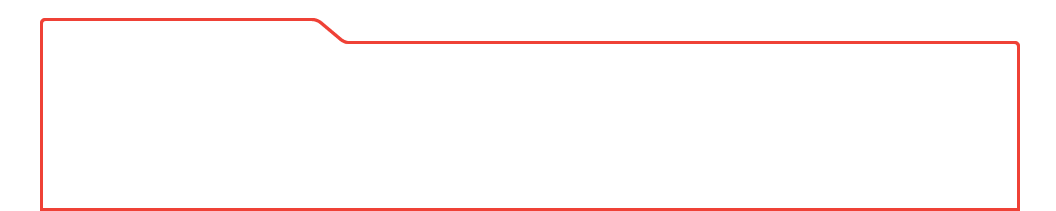
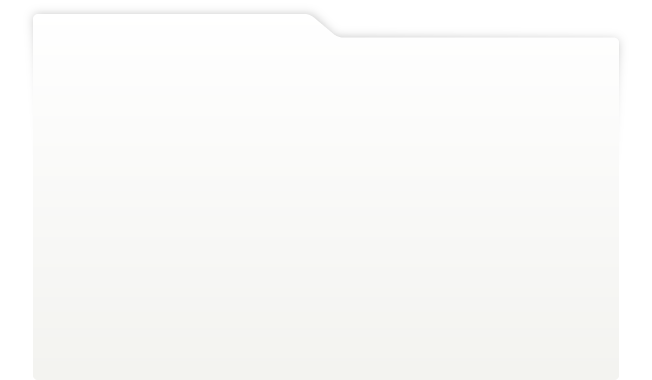
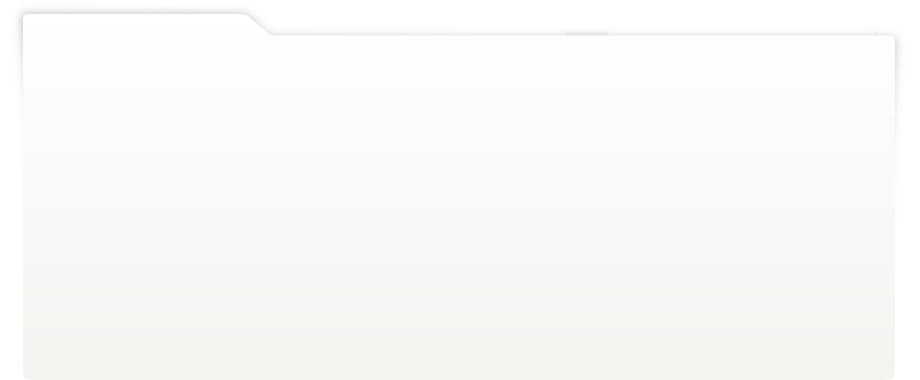
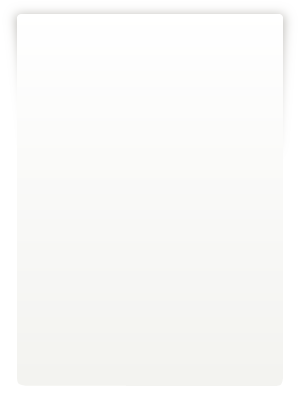
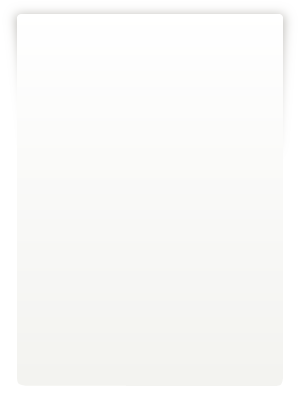
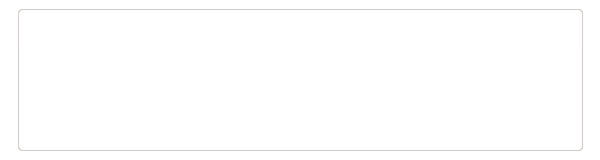
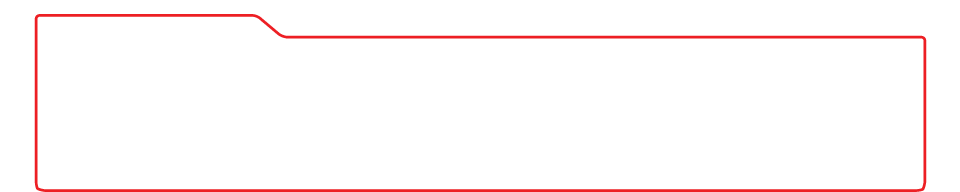
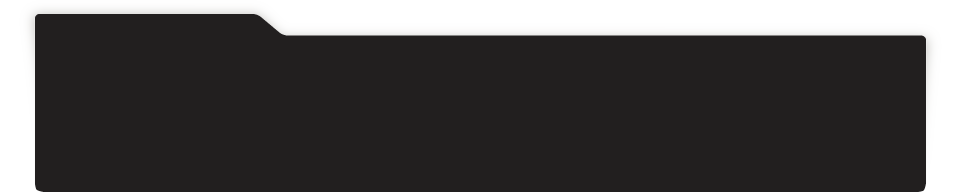
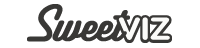
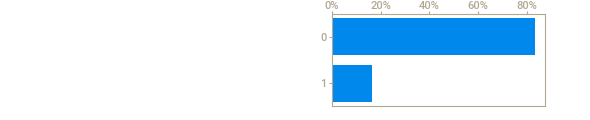
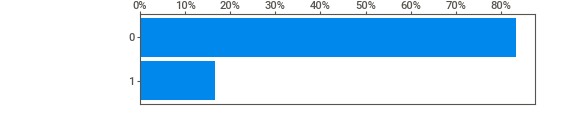
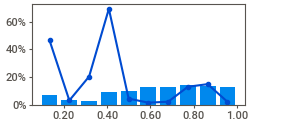
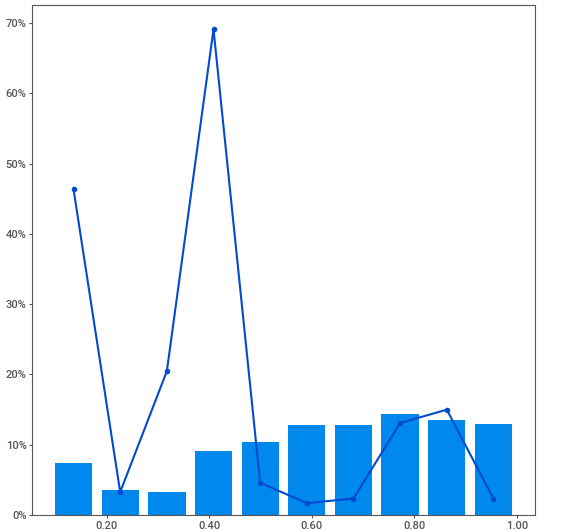
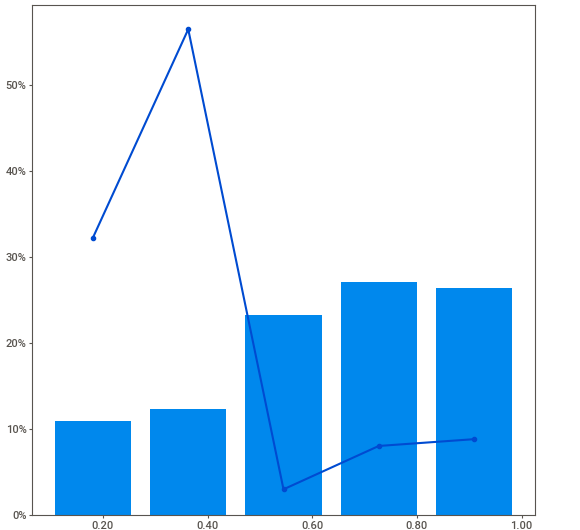
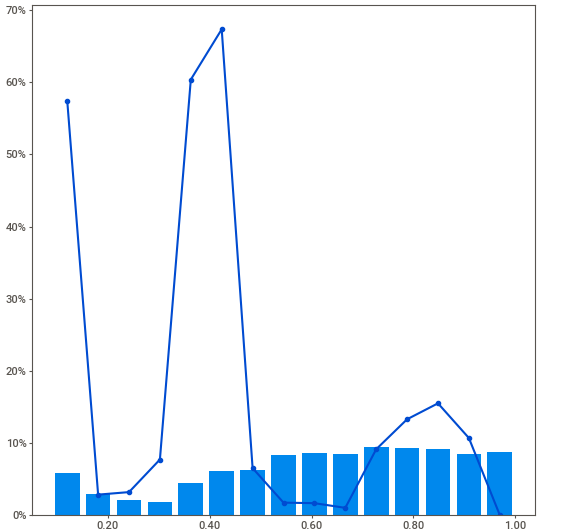
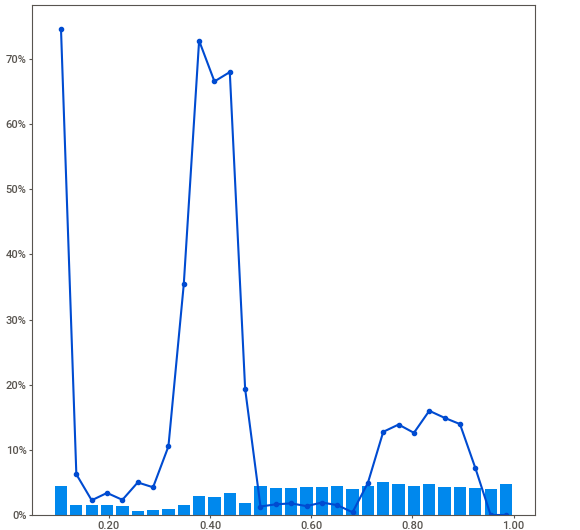
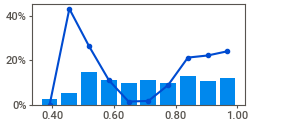
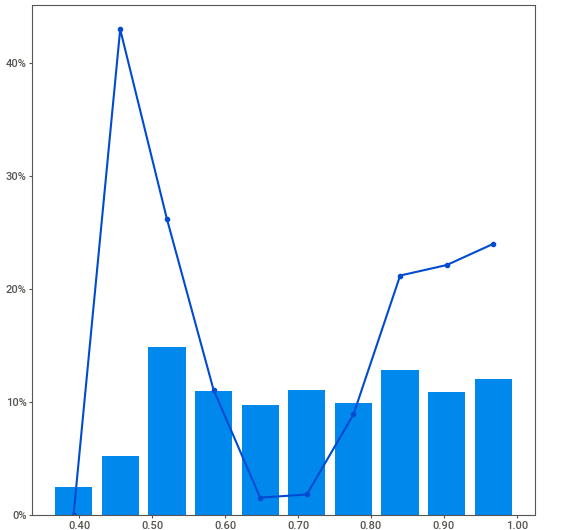
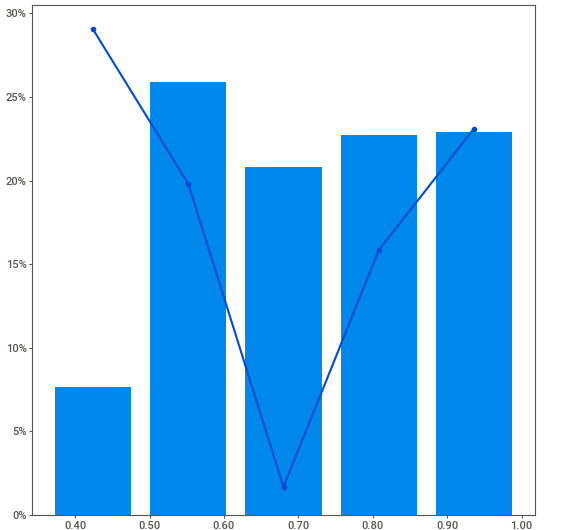
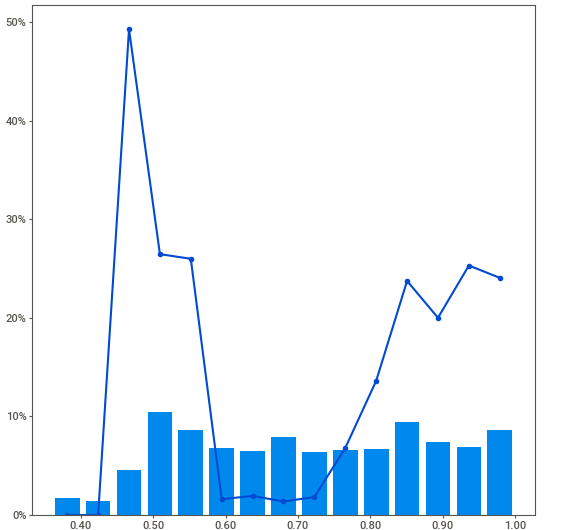
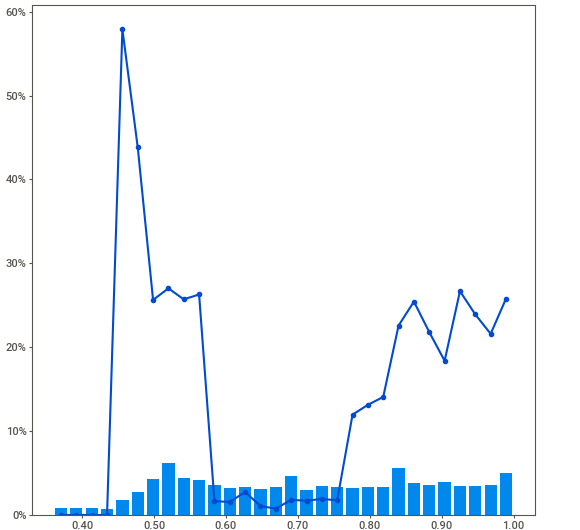
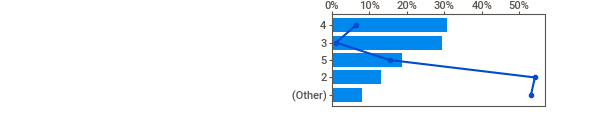
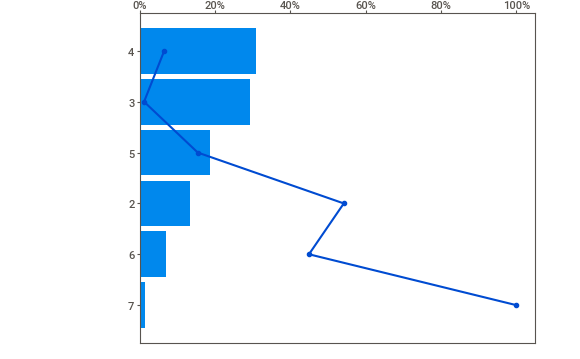
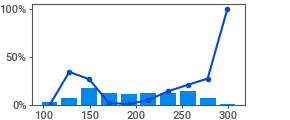
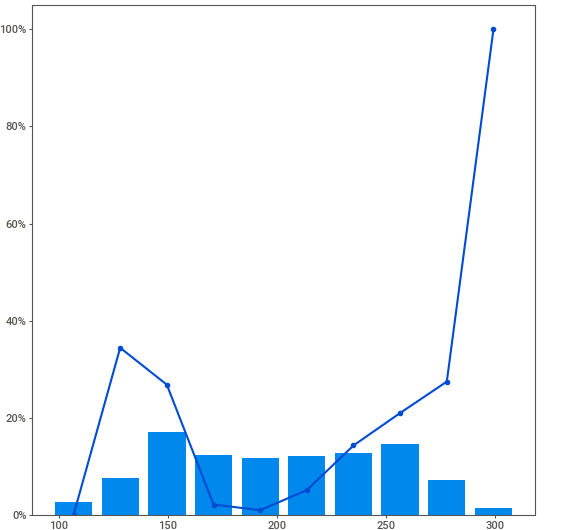
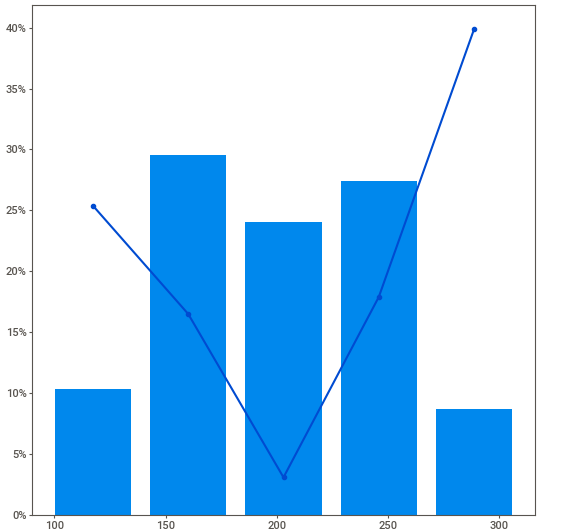
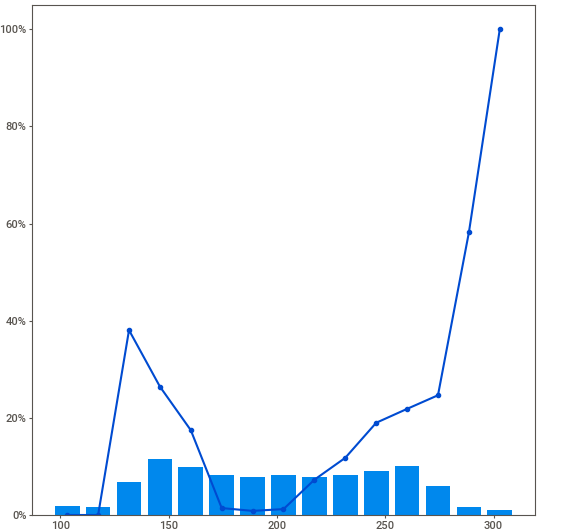
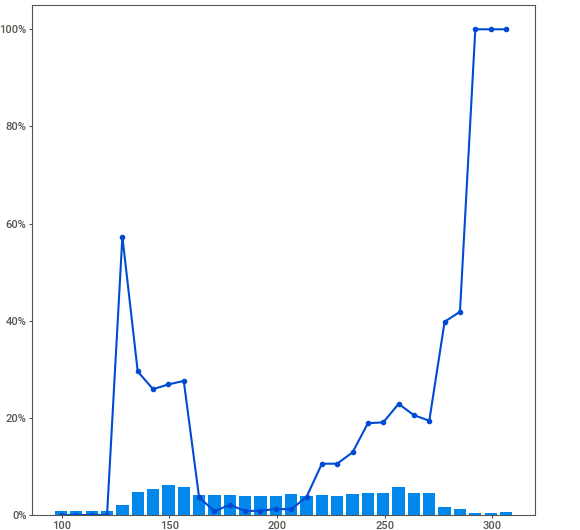
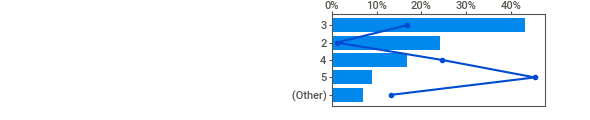
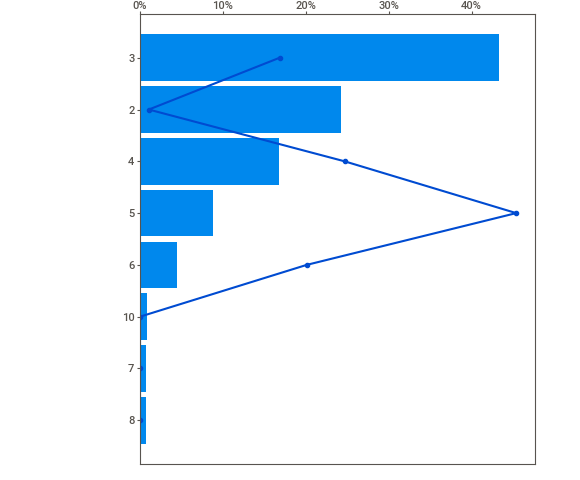
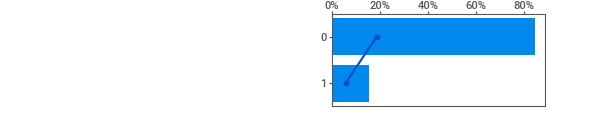
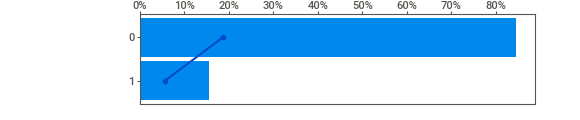
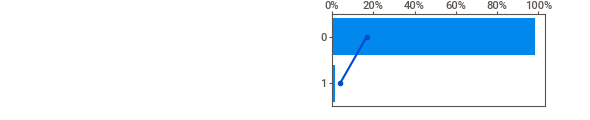
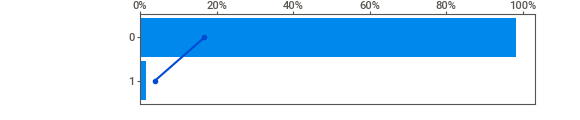
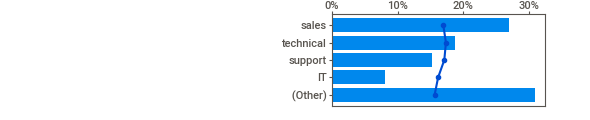
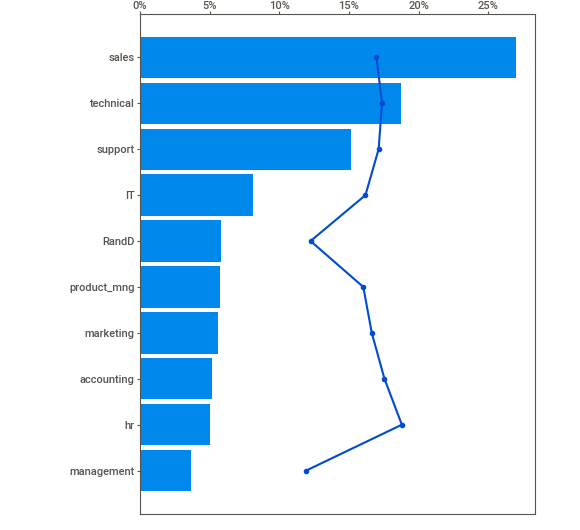
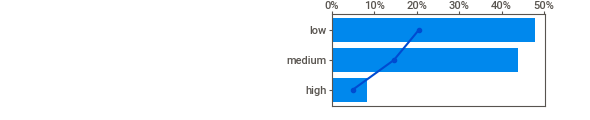
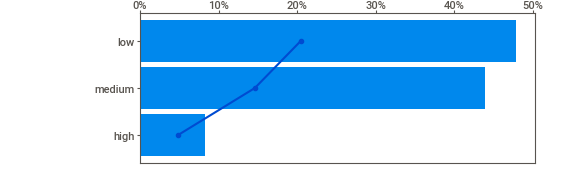
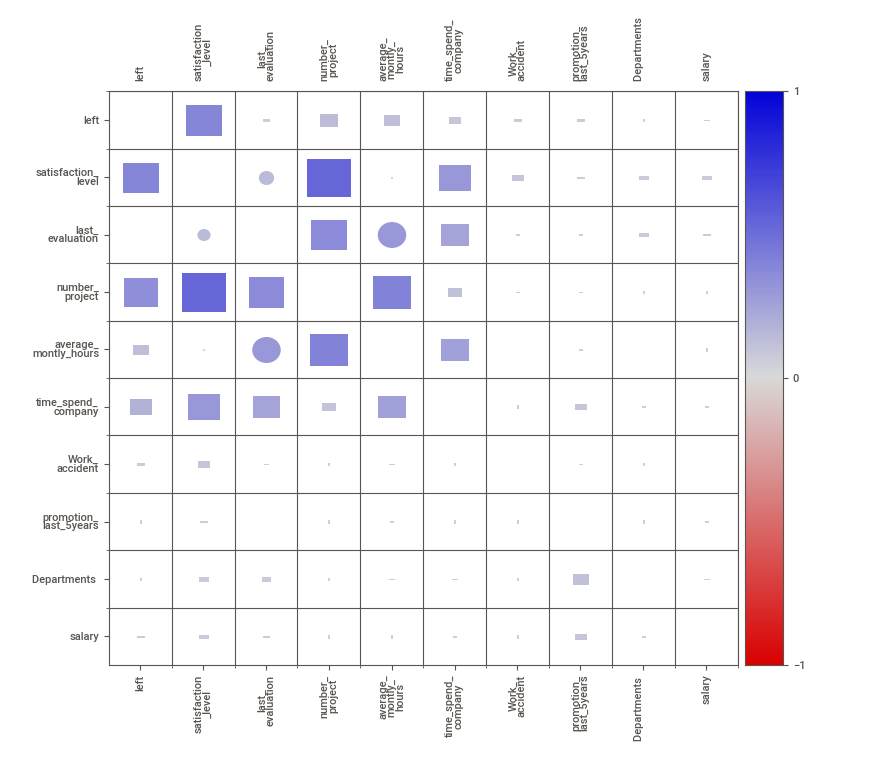
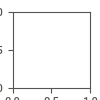

In [117]:
import sweetviz # for visualizing the data

my_report = sweetviz.analyze([df, "original data"],target_feat='left')

my_report.show_notebook(layout="vertical", w ="980", h= 700, scale= .8)

In [118]:
df.left.unique()

array([1, 0], dtype=int64)

In [119]:
stayed = df[df.left == 0]
stayed

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Departments,salary
2000,0.580,0.740,4,215,3,0,0,0,sales,low
2001,0.820,0.670,2,202,3,0,0,0,sales,low
2002,0.450,0.690,5,193,3,0,0,0,sales,low
2003,0.780,0.820,5,247,3,0,0,0,sales,low
2004,0.490,0.600,3,214,2,0,0,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
11995,0.900,0.550,3,259,10,1,0,1,management,high
11996,0.740,0.950,5,266,10,0,0,1,management,high
11997,0.850,0.540,3,185,10,0,0,1,management,high
11998,0.330,0.650,3,172,10,0,0,1,marketing,high


In [120]:
stayed.shape

(10000, 10)

In [121]:
stayed.describe().T

,count,mean,std,min,25%,50%,75%,max
satisfaction_level,10000.000,0.667,0.217,0.120,0.540,0.690,0.840,1.000
last_evaluation,10000.000,0.716,0.162,0.360,0.580,0.710,0.850,1.000
number_project,10000.000,3.787,0.982,2.000,3.000,4.000,4.000,6.000
average_montly_hours,10000.000,198.943,45.666,96.000,162.000,198.000,238.000,287.000
time_spend_company,10000.000,3.262,1.367,2.000,2.000,3.000,4.000,10.000
Work_accident,10000.000,0.174,0.380,0.000,0.000,0.000,0.000,1.000
left,10000.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
promotion_last_5years,10000.000,0.019,0.138,0.000,0.000,0.000,0.000,1.000


In [122]:
left = df[df.left == 1]
left

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Departments,salary
0,0.380,0.530,2,157,3,0,1,0,sales,low
1,0.800,0.860,5,262,6,0,1,0,sales,medium
2,0.110,0.880,7,272,4,0,1,0,sales,medium
3,0.720,0.870,5,223,5,0,1,0,sales,low
4,0.370,0.520,2,159,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
1995,0.370,0.570,2,147,3,0,1,0,sales,low
1996,0.110,0.920,7,293,4,0,1,0,sales,low
1997,0.410,0.530,2,157,3,0,1,0,sales,low
1998,0.840,0.960,4,247,5,0,1,0,sales,low


In [123]:
left.shape

(1991, 10)

In [124]:
left.describe().T

,count,mean,std,min,25%,50%,75%,max
satisfaction_level,1991.000,0.440,0.265,0.090,0.110,0.410,0.730,0.920
last_evaluation,1991.000,0.722,0.197,0.450,0.520,0.790,0.910,1.000
number_project,1991.000,3.883,1.817,2.000,2.000,4.000,6.000,7.000
average_montly_hours,1991.000,208.162,61.295,126.000,146.000,226.000,262.500,310.000
time_spend_company,1991.000,3.881,0.974,2.000,3.000,4.000,5.000,6.000
Work_accident,1991.000,0.053,0.224,0.000,0.000,0.000,0.000,1.000
left,1991.000,1.000,0.000,1.000,1.000,1.000,1.000,1.000
promotion_last_5years,1991.000,0.004,0.063,0.000,0.000,0.000,0.000,1.000


In [125]:
df.groupby("left").mean()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years
left,,,,,,,
0,0.667,0.716,3.787,198.943,3.262,0.174,0.019
1,0.440,0.722,3.883,208.162,3.881,0.053,0.004


In [126]:
df["departments"] = df["Departments "]

In [127]:
df.drop("Departments ", axis=1, inplace=True)

Moving target feature to the last for our easiness

In [128]:
cols = df.columns.tolist()
new_position = 10

cols.insert(new_position, cols.pop(cols.index('left')))
df = df[cols]

In [129]:
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,salary,departments,left
0,0.380,0.530,2,157,3,0,0,low,sales,1
1,0.800,0.860,5,262,6,0,0,medium,sales,1
2,0.110,0.880,7,272,4,0,0,medium,sales,1
3,0.720,0.870,5,223,5,0,0,low,sales,1
4,0.370,0.520,2,159,3,0,0,low,sales,1


## 2. Data Visualization

You can search for answers to the following questions using data visualization methods. Based on these responses, you can develop comments about the factors that cause churn.
- How does the promotion status affect employee churn?
- How does years of experience affect employee churn?
- How does workload affect employee churn?
- How does the salary level affect employee churn?

### Employees Left

Let's check how many employees were left?
Here, you can plot a bar graph using Matplotlib. The bar graph is suitable for showing discrete variable counts.

In [215]:
cprint('"left employees" count','green', 'on_yellow')
df.left.value_counts()

"left employees" count


0    10000
1     1991
Name: left, dtype: int64

"left employees" Column Distribution


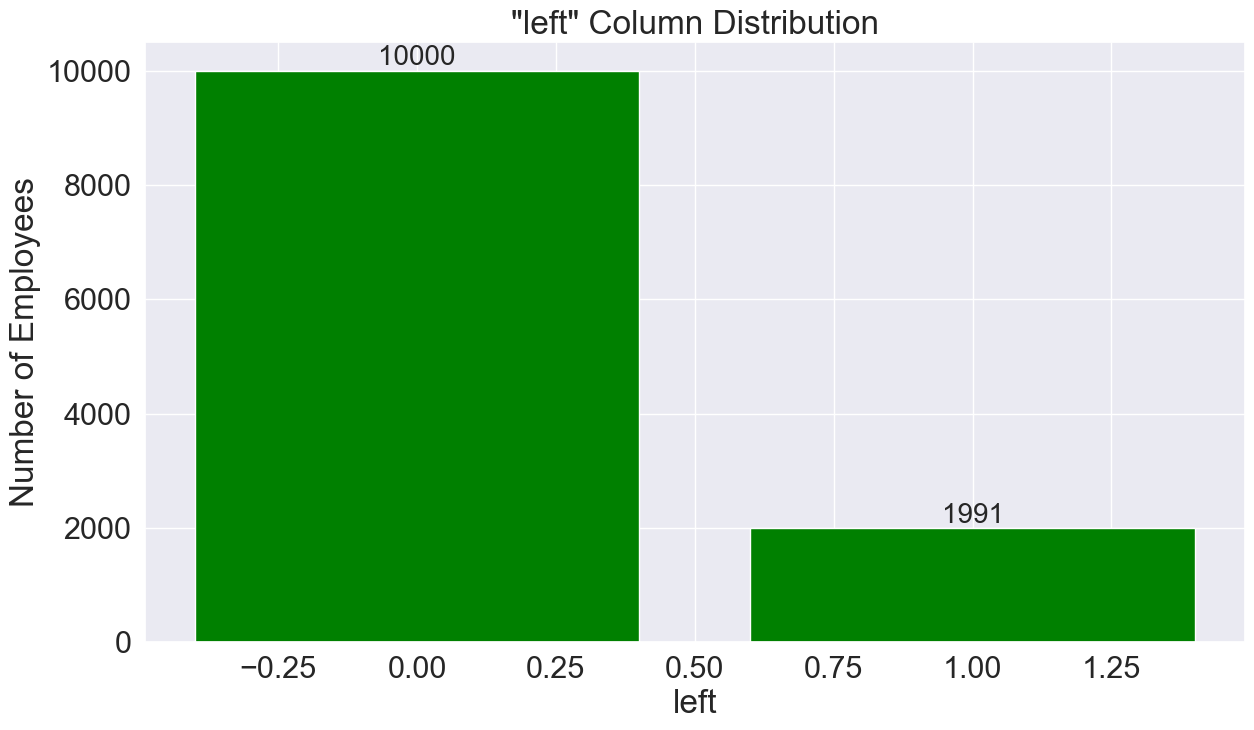

In [216]:
cprint('"left employees" Column Distribution','green', 'on_yellow')
fig = plt.figure(figsize = (11,6))
ax = fig.add_axes([0,0,1,1])
ax.bar(df.left.value_counts().index, df.left.value_counts().values, color = 'green')
plt.title('"left" Column Distribution')   
plt.xlabel('left') 
plt.ylabel('Number of Employees') 
sns.set(font_scale = 1)
for index,value in enumerate(df.left.value_counts()):
    plt.text(index, value, f'{value}', ha = 'center', va = 'bottom', fontsize = 20)
plt.show()

Here, you can see out of 11,991 approx 1991 were left, and 10,000 stayed. The no of employee left is 16.6 % of the total employment.

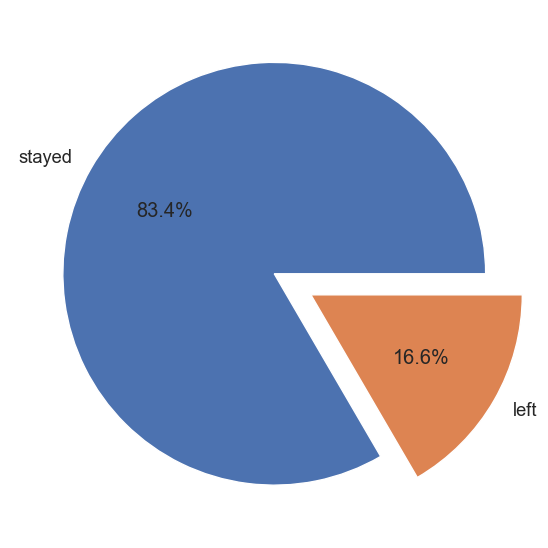

In [220]:
# pie chart
fig, ax = plt.subplots(figsize=(12,7))
explode = (0, 0.2)
ax.pie(x=df.left.value_counts().values, 
       labels=['stayed','left'], 
       autopct='%.1f%%', explode=explode   
       )
plt.show()

#### left by salary

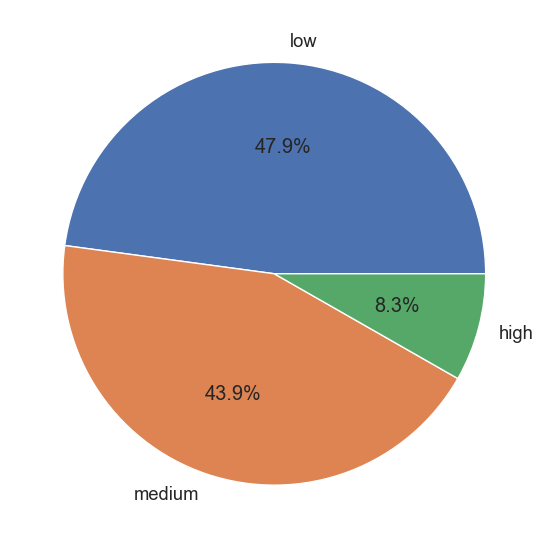

In [218]:
fig, ax = plt.subplots(figsize=(12,7))
ax.pie(x=df.salary.value_counts().values, 
       labels=['low','medium', "high"], 
       autopct='%.1f%%',    
       )
plt.shw()

"left by salary" Column Distribution


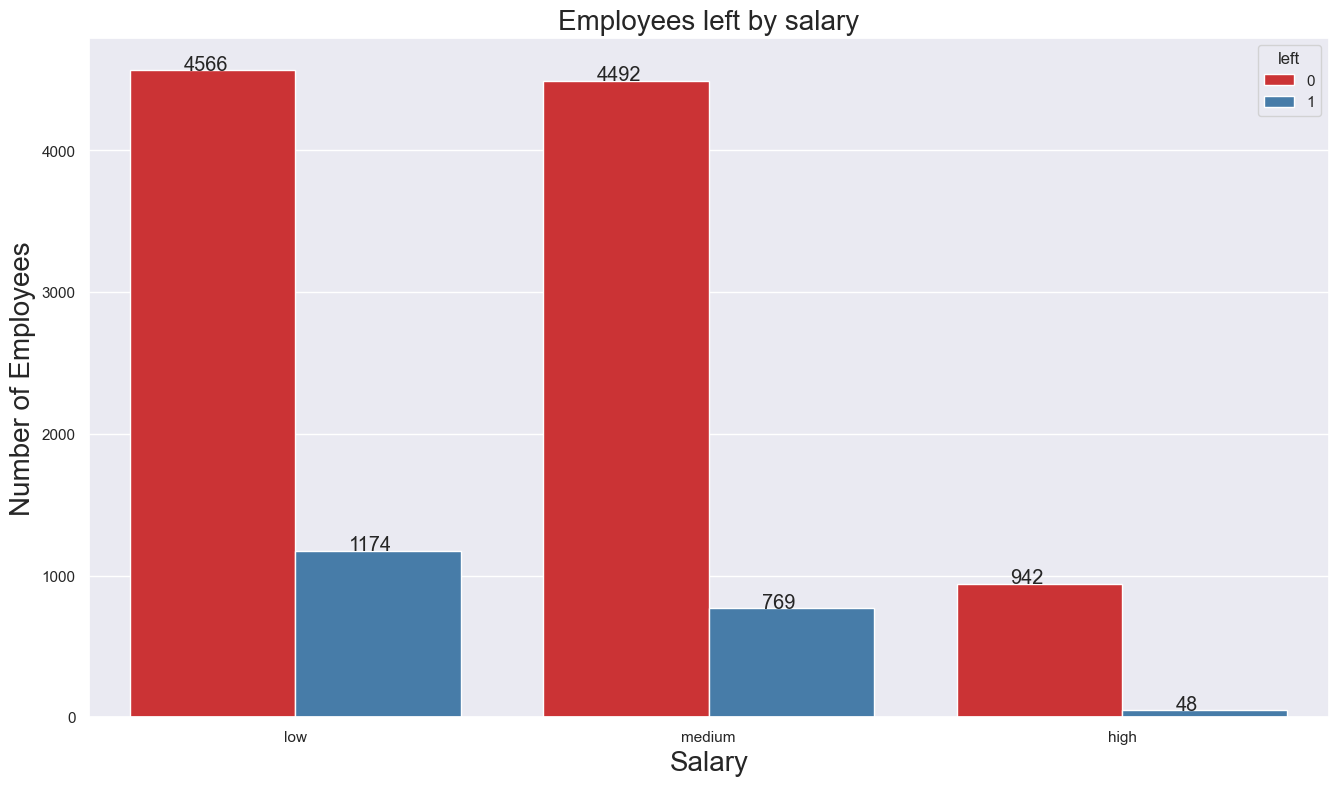

In [217]:
cprint('"left by salary" Column Distribution','green', 'on_yellow')

fig, ax = plt.subplots(figsize=(16,9))

ax = sns.countplot(x = 'salary' ,hue ='left' ,palette = "Set1" , data= df)
ax.set_xlabel("Salary", fontsize = 20)
ax.set_ylabel("Number of Employees", fontsize = 20)
ax.set_title("Employees left by salary", fontsize = 20)
sns.set(font_scale = 1.2)
for p in ax.patches:
    ax.annotate(p.get_height(), (p.get_x()+0.13, p.get_height()+1))

plt.show()


We can observe that employees with low and medium salary are more likely to leave the organization than employees with higher salaries. However, the first two bars show that there are more employees with low and medium salary than higher ones'

#### left by departments

"left by departments" Column Distribution


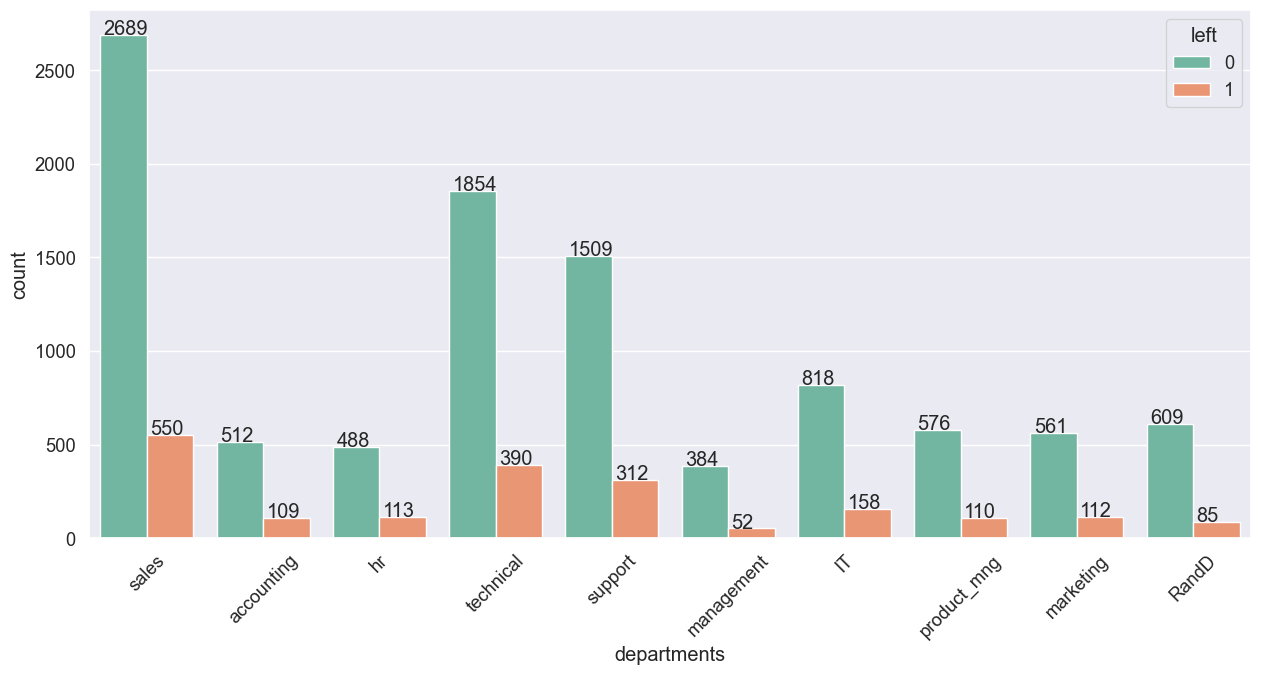

In [167]:
cprint('"left by departments" Column Distribution','green', 'on_yellow')

fig, ax = plt.subplots(figsize = (15, 7))

ax = sns.countplot(x = "departments" ,hue ='left' ,palette = "Set2" , data= df)
sns.set(font_scale = 1.2)
for p in ax.patches:
    ax.annotate(p.get_height(), (p.get_x()+0.03, p.get_height()+1))
plt.xticks(rotation=45)

plt.show()

The points observed are as follows:
* This tells that employees working in the sales department are more than any other department.
* The employees working in management department are less than any other department.
* Most employees left are from sales department.
* The department with least number of employees leaving is management.


#### left by promotion

"left by promotion" Column Distribution


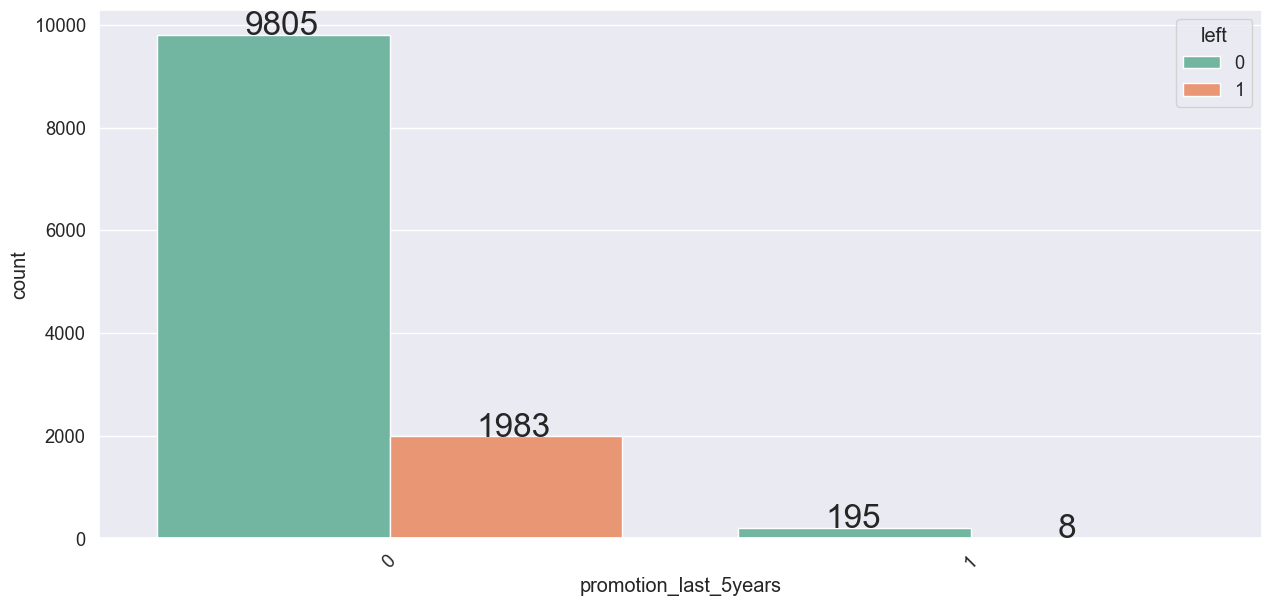

In [169]:
cprint('"left by promotion" Column Distribution','green', 'on_yellow')

fig, ax = plt.subplots(figsize = (15, 7))

ax = sns.countplot(x = "promotion_last_5years" ,hue ='left' ,palette = "Set2" , data= df)
sns.set(font_scale = 2)
for p in ax.patches:
    ax.annotate(p.get_height(), (p.get_x()+0.15, p.get_height()+1))
plt.xticks(rotation=45)

plt.show()

Employess who havent had promotion in last the 5 years are more likely to leave.

#### left by satisfaction

In [205]:
high_satisfaction = df.loc[df["satisfaction_level"]>=0.5]

In [212]:
high_satisfaction["left"].value_counts()

0    8228
1     579
Name: left, dtype: int64

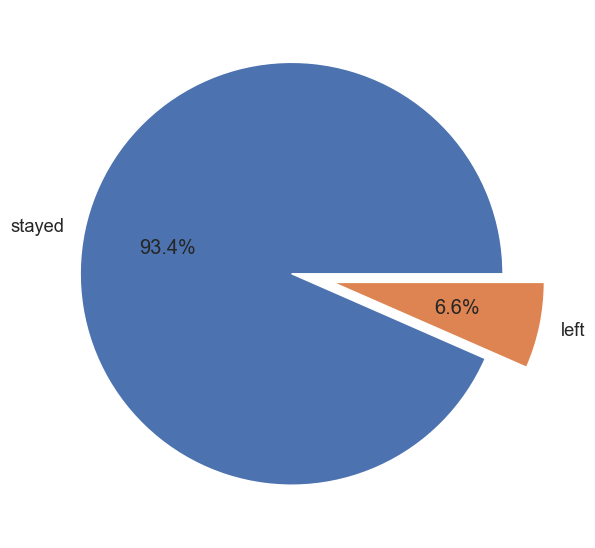

In [221]:
fig, ax = plt.subplots(figsize=(12,7))

ax.pie(x=high_satisfaction.left.value_counts().values, 
       labels=['stayed','left'], 
       autopct='%.1f%%', explode=explode   
       )
plt.show()

In [209]:
 low_satisfaction = df[df["satisfaction_level"]<0.5]

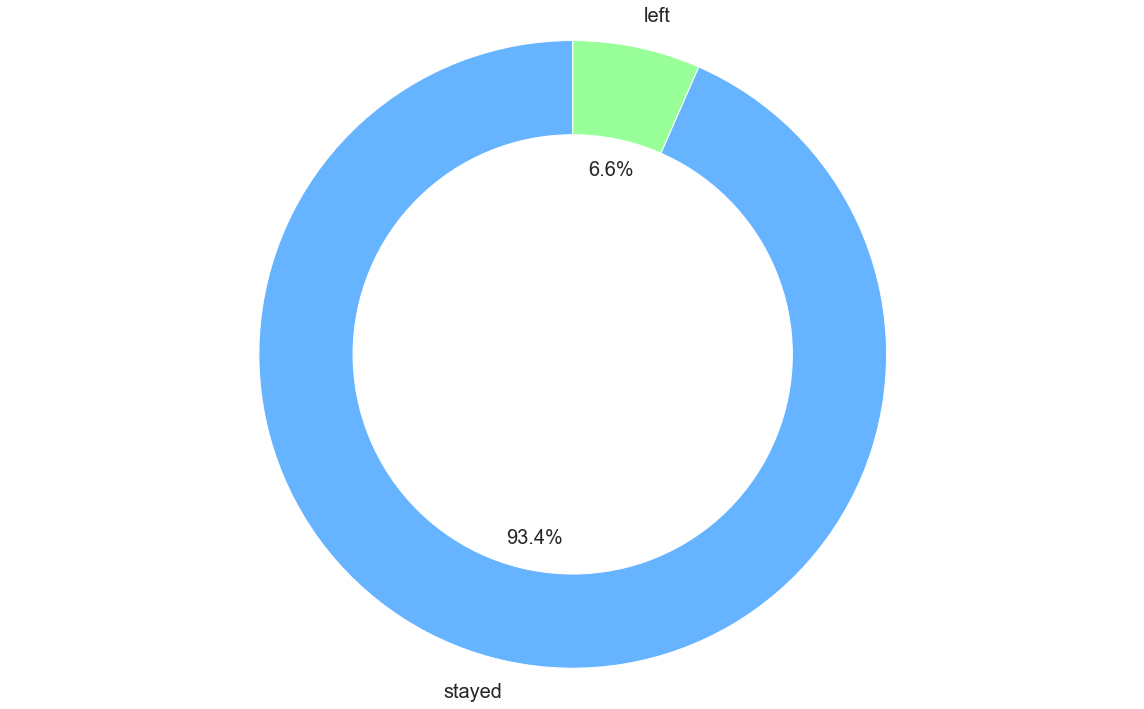

In [254]:
colors = ['#66b3ff','#99ff99','#ffcc99']

fig1, ax1 = plt.subplots()
ax1.pie(x=high_satisfaction.left.value_counts().values, 
       labels=['stayed','left'], colors=colors,
       autopct='%.1f%%', startangle=90, textprops={'fontsize': 20})
        
        
#draw circle
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
        
        
# Equal aspect ratio ensures that pie is drawn as a circle
ax1.axis('equal')  
plt.tight_layout()
plt.show()

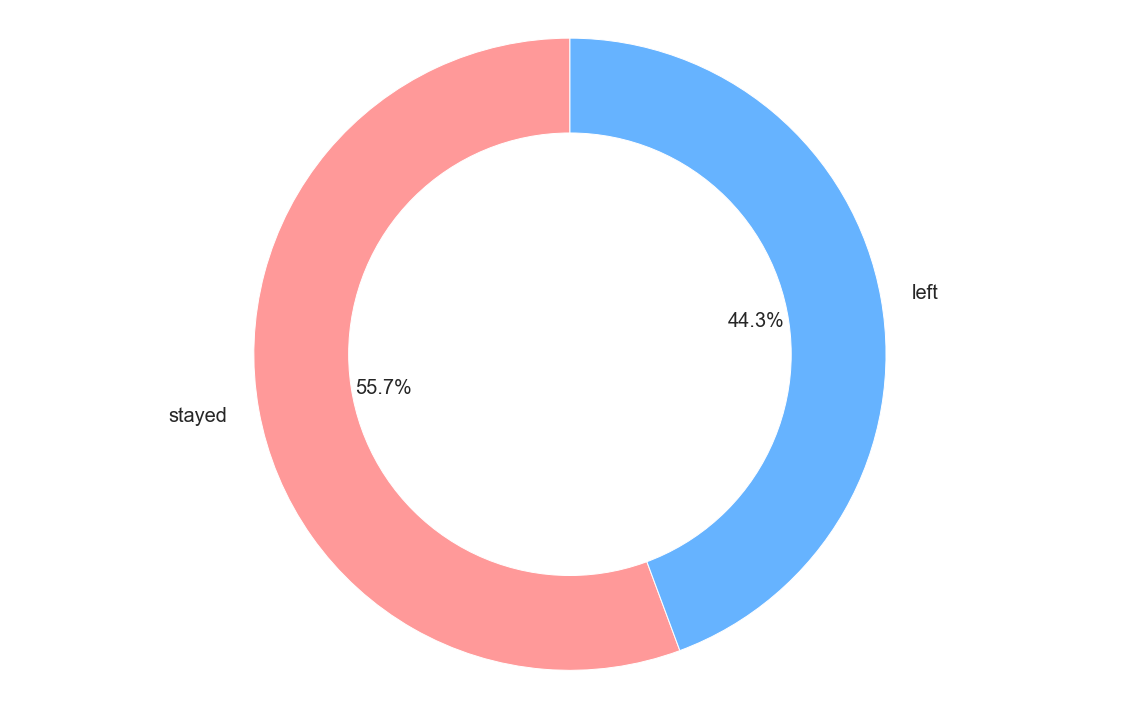

In [252]:
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99']

fig1, ax1 = plt.subplots()
ax1.pie(x=low_satisfaction.left.value_counts().values, 
       labels=['stayed','left'], colors=colors,
       autopct='%.1f%%', startangle=90, textprops={'fontsize': 20})
        
        
#draw circle
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
        
        
# Equal aspect ratio ensures that pie is drawn as a circle
ax1.axis('equal')  
plt.tight_layout()
plt.show()

### Number of Projects

Similarly, you can also plot a bar graph to count the number of employees deployed on how many projects?

In [180]:
cprint('"number of project" Column Distribution','green', 'on_yellow')
df.number_project.value_counts()

"number of project" Column Distribution


4    3685
3    3520
5    2233
2    1582
6     826
7     145
Name: number_project, dtype: int64

"number of projects" Column Distribution


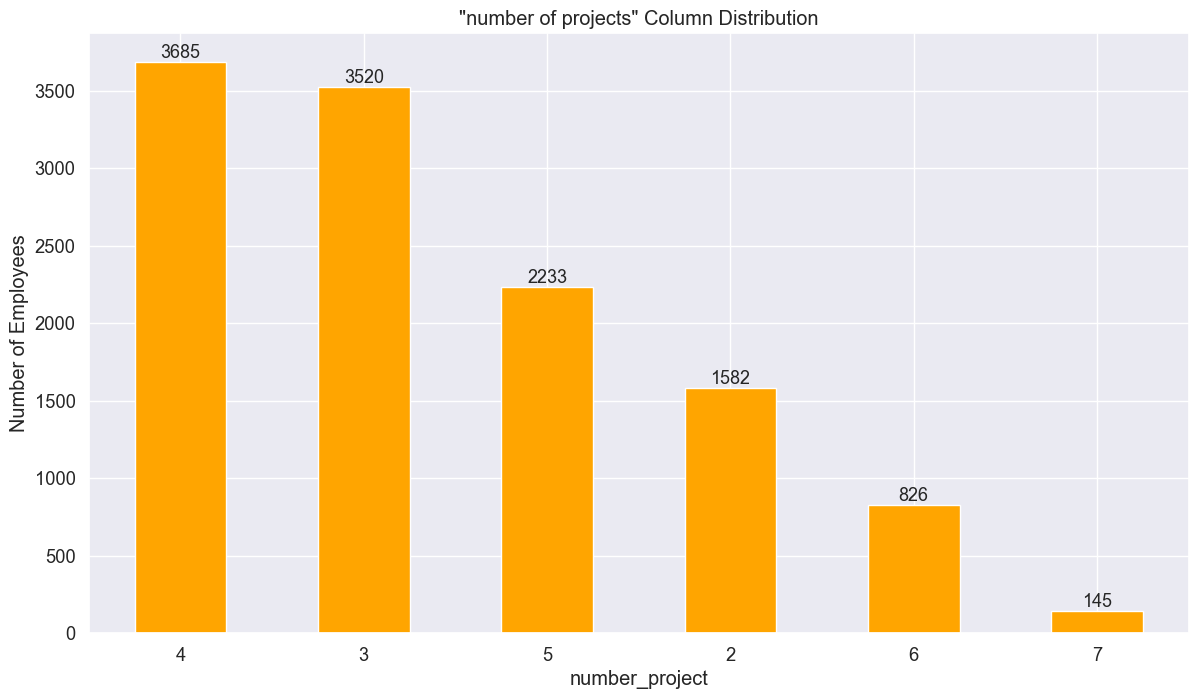

In [223]:
cprint('"number of projects" Column Distribution','green', 'on_yellow')
fig = plt.figure(figsize = (11,6))
ax = fig.add_axes([0,0,1,1])
# x = df.number_project.value_counts().index
# y = df.number_project.value_counts().values
df.number_project.value_counts().plot(kind = "bar", color = "orange")
plt.title('"number of projects" Column Distribution')   
plt.xlabel('number_project') 
plt.ylabel('Number of Employees')
plt.xticks(rotation = 0)
sns.set(font_scale = 2)
for index,value in enumerate(df.number_project.value_counts().sort_values(ascending=False)):
    plt.text(index, value, f'{value}', ha = 'center', va = 'bottom', fontsize = 13)
plt.show()

Most of the employee is doing the project from 3-5.

"number of projects" Column Distribution


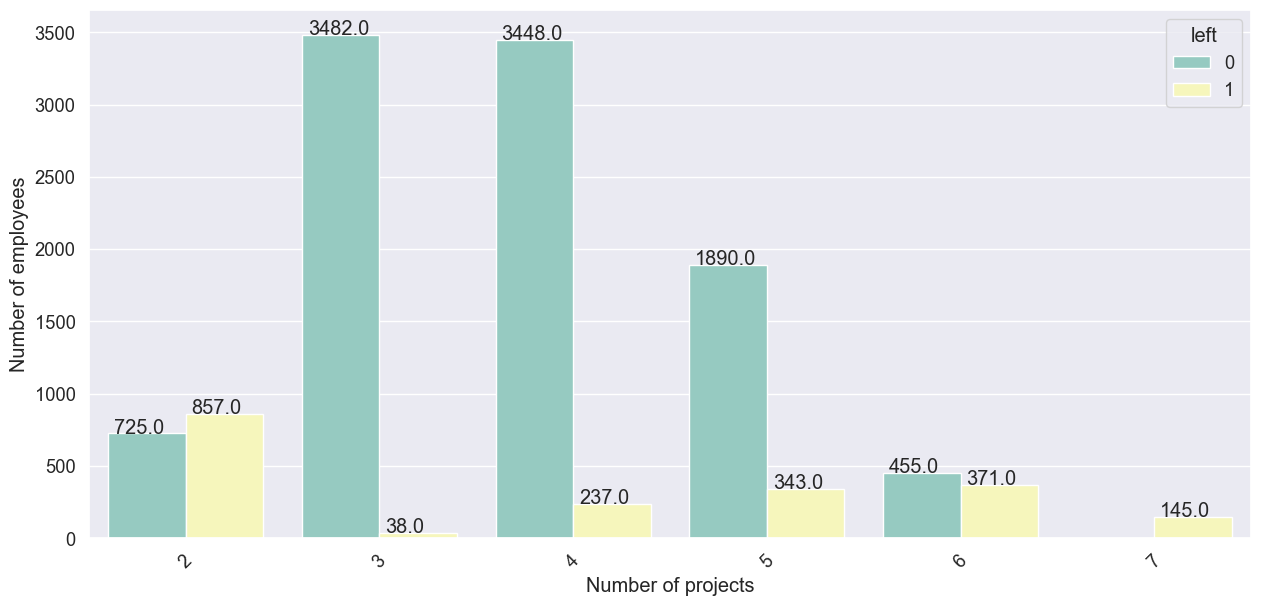

In [173]:
cprint('"number of projects" Column Distribution','green', 'on_yellow')

fig, ax = plt.subplots(figsize = (15, 7))

ax = sns.countplot(x = "number_project" ,hue ='left' ,palette = "Set3" , data= df)
sns.set(font_scale = 1.2)
for p in ax.patches:
    ax.annotate(p.get_height(), (p.get_x()+0.03, p.get_height()+1))
plt.xlabel("Number of projects")
plt.ylabel("Number of employees")
plt.xticks(rotation=45)

plt.show()

More than all employess who have done 2 porojects left the company. Also employees with 6 and 7 projects most likely to leave.

### Time Spent in Company

Similarly, you can also plot a bar graph to count the number of employees have based on how much experience?


In [179]:
cprint('"time spend" Column Distribution','green', 'on_yellow')
df.time_spend_company.value_counts()

"time spend" Column Distribution


3     5190
2     2910
4     2005
5     1062
6      542
10     107
7       94
8       81
Name: time_spend_company, dtype: int64

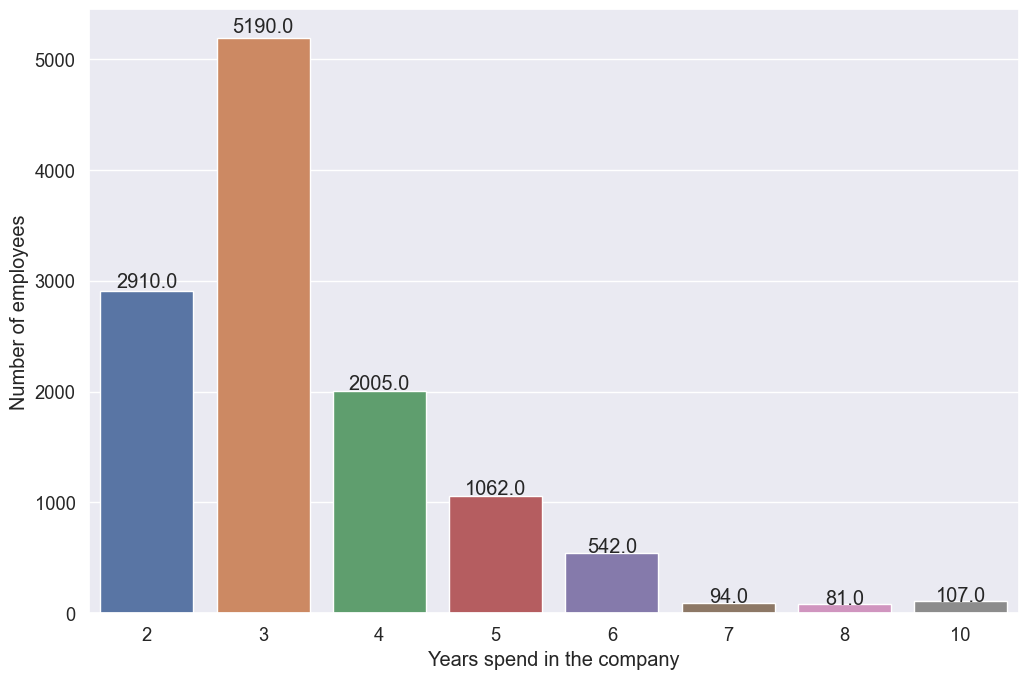

In [177]:
# with seaborn

# Show Values on Seaborn Barplot
def show_values(axs, orient="v", space=.01):
    def _single(ax):
        if orient == "v":
            for p in ax.patches:
                _x = p.get_x() + p.get_width() / 2
                _y = p.get_y() + p.get_height() + (p.get_height()*0.01)
                value = '{:.1f}'.format(p.get_height())
                ax.text(_x, _y, value, ha="center") 
        elif orient == "h":
            for p in ax.patches:
                _x = p.get_x() + p.get_width() + float(space)
                _y = p.get_y() + p.get_height() - (p.get_height()*0.5)
                value = '{:.1f}'.format(p.get_width())
                ax.text(_x, _y, value, ha="left")

    if isinstance(axs, np.ndarray):
        for idx, ax in np.ndenumerate(axs):
            _single(ax)
    else:
        _single(axs)
plt.figure(figsize = (12,8))
ax = sns.countplot(data = df, x = 'time_spend_company');
plt.xlabel("Years spend in the company")
plt.ylabel("Number of employees")
show_values(ax)

"left by years spend" Column Distribution


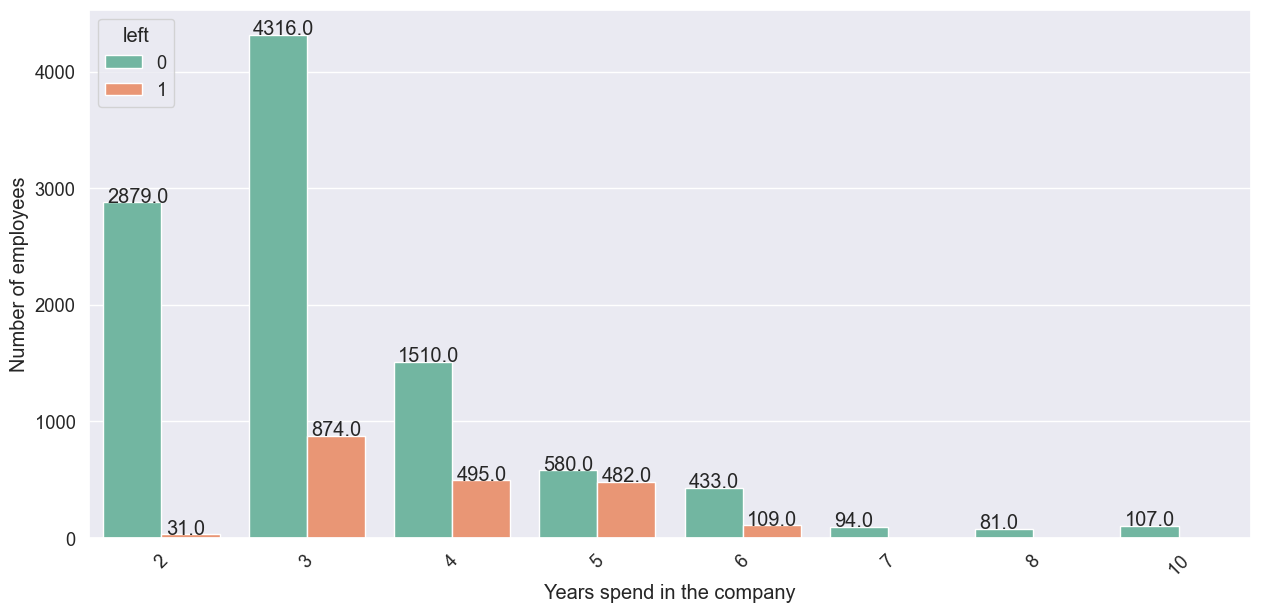

In [226]:
cprint('"left by years spend" Column Distribution','green', 'on_yellow')

fig, ax = plt.subplots(figsize = (15, 7))

ax = sns.countplot(x = "time_spend_company" ,hue ='left' ,palette = "Set2" , data= df)
for p in ax.patches:
    ax.annotate(p.get_height(), (p.get_x()+0.03, p.get_height()+1))
plt.xlabel("Years spend in the company")
plt.ylabel("Number of employees")
plt.xticks(rotation=45)
sns.set(font_scale = 1)

plt.show()

The employee with five-year experience is leaving more because of no promotions in last 5 years and more than 6 years experience are not leaving because of affection with the company.

### Subplots of Features

You can use the methods of the matplotlib.

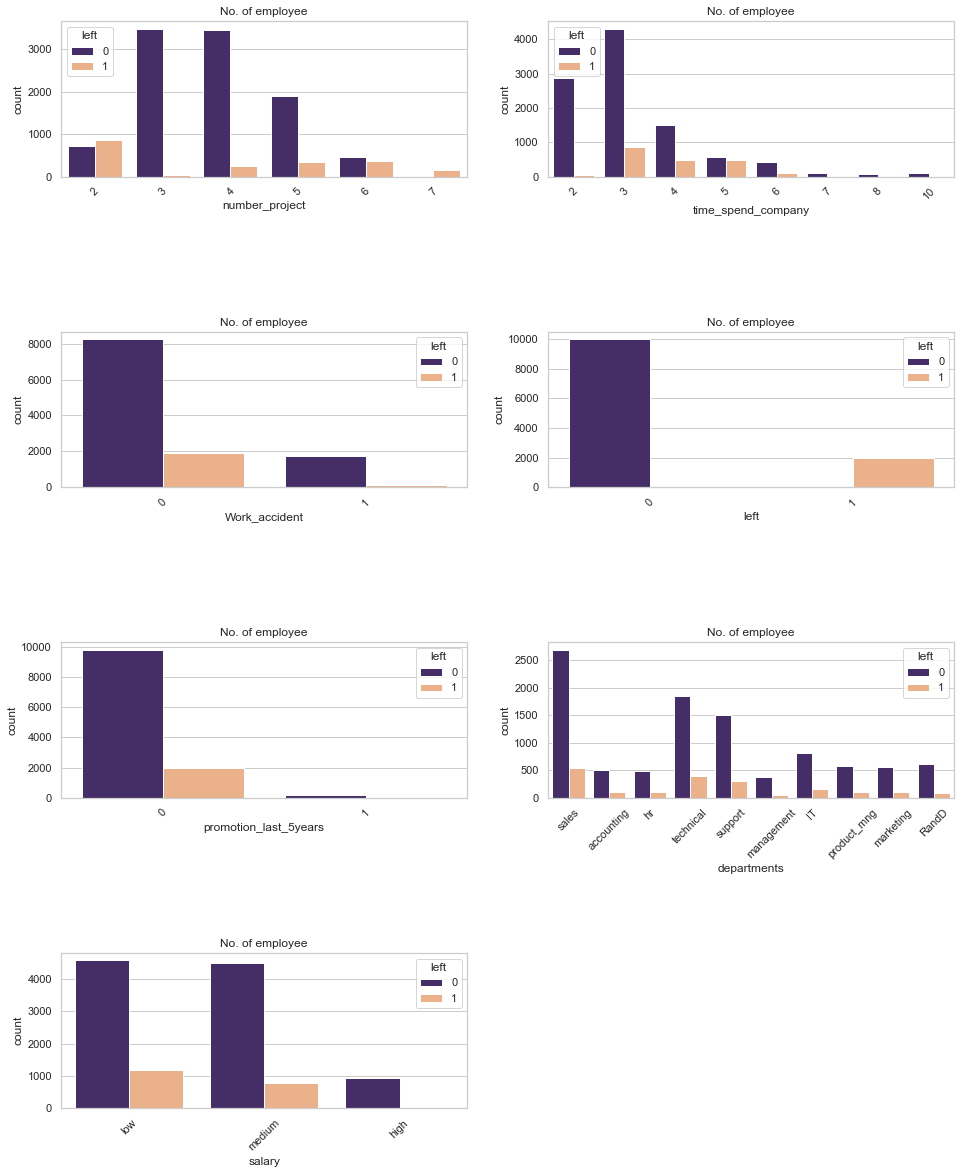

In [258]:
features=['number_project','time_spend_company','Work_accident','left', 'promotion_last_5years','departments','salary']
fig=plt.subplots(figsize=(16,20))
for i, j in enumerate(features):
    plt.subplot(4, 2, i+1)
    plt.subplots_adjust(hspace = 1.0)
    sns.countplot(x=j,data = df,hue='left', palette=['#432371',"#FAAE7B"])
    plt.xticks(rotation=45)
    plt.title("No. of employee")

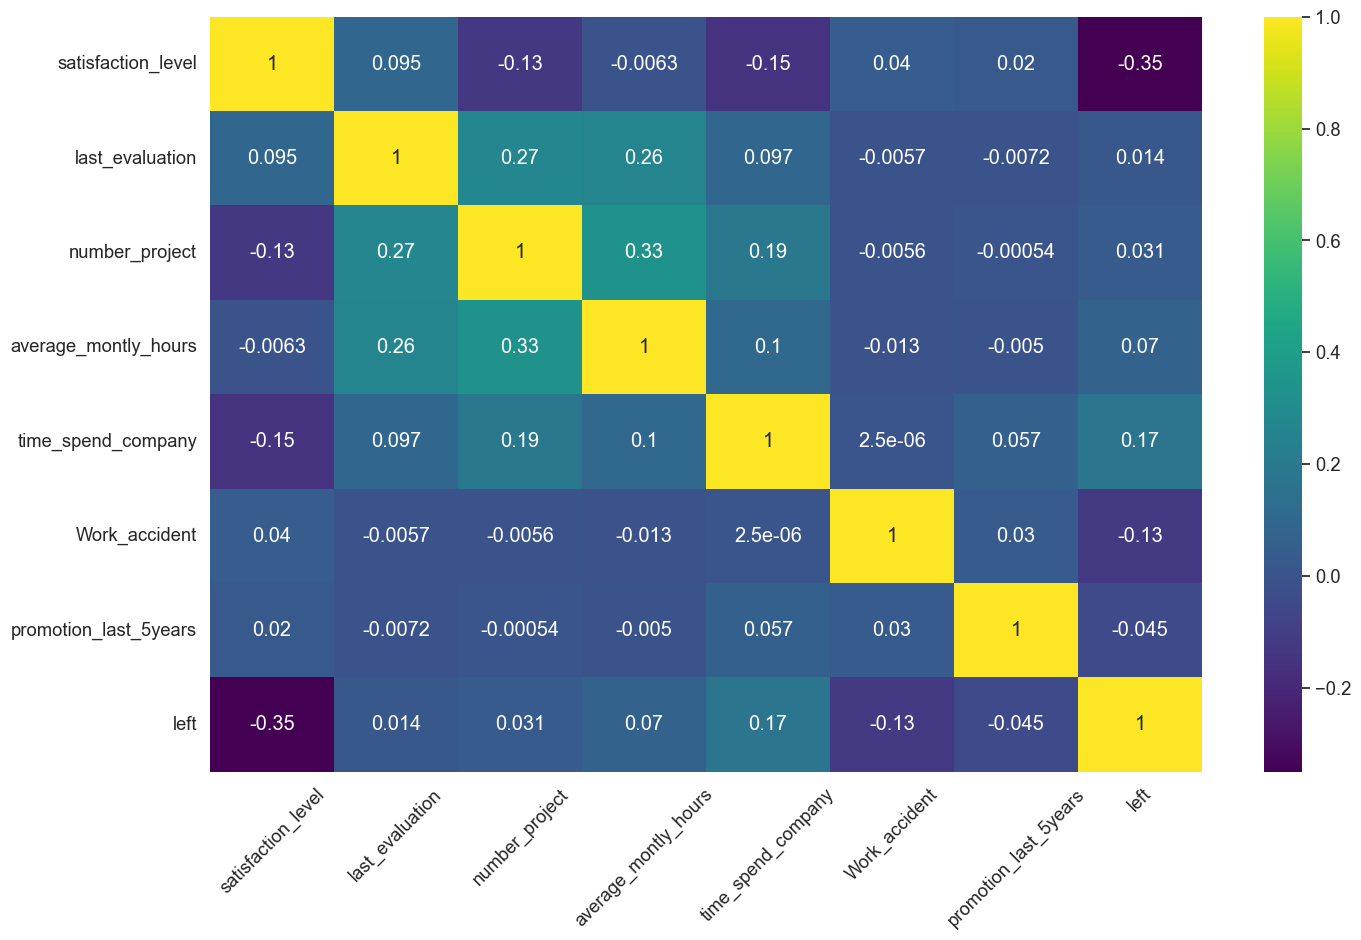

In [181]:
plt.figure(figsize = (16, 10))
ax = sns.heatmap(df.corr(), annot = True, cmap = 'viridis')
plt.xticks(rotation=45)
plt.show()

Here I've plotted a heatmap above that shows the relationships between two variables based on values and colors.
* The factor that most influence the decision of an employee whether they will stay in a company or not is time   spend at company
* Satisfication level also does not seems to have a good relation with column (left).

## 3. Data Pre-Processing

### Split Data as Train and Test Set

- In supervised models, Dataset is broken into two parts, for example, in ratio of 70:30. It means 70% data will used for model training and 30% for model testing.
- For unsupervised learning we use all data for model keep in mind.

#### Ordinal Encoding

Lots of machine learning algorithms require numerical input data, so you need to represent categorical columns in a numerical column. In order to encode this data, you could map each value to a number. e.g. Salary column's value can be represented as low:0, medium:1, and high:2. This process is known as ordinal encoding, and sklearn conveniently will do this for you using [OrdinalEncoder](https://datascience.stackexchange.com/questions/39317/difference-between-ordinalencoder-and-labelencoder).



#### Scaling

Some machine learning algorithms are sensitive to feature scaling while others are virtually invariant to it. Machine learning algorithms like linear regression, logistic regression, neural network, etc. that use gradient descent as an optimization technique require data to be scaled. Also distance algorithms like KNN, K-means, and SVM are most affected by the range of features. This is because behind the scenes they are using distances between data points to determine their similarity.

Scaling Types:
- Normalization: Normalization is a scaling technique in which values are shifted and rescaled so that they end up ranging between 0 and 1. It is also known as Min-Max scaling.

- Standardization: Standardization is another scaling technique where the values are centered around the mean with a unit standard deviation. This means that the mean of the attribute becomes zero and the resultant distribution has a unit standard deviation.

    

## 4. Cluster Analysis (Unsupervised)

- Cluster analysis or clustering is the task of grouping a set of objects in such a way that objects in the same group (called a cluster) are more similar (in some sense) to each other than to those in other groups (clusters). It is a main task of exploratory data mining, and a common technique for statistical data analysis, used in many fields, including pattern recognition, image analysis, information retrieval, bioinformatics, data compression, computer graphics and machine learning.

    [Cluster Analysis](https://en.wikipedia.org/wiki/Cluster_analysis)

    [Cluster Analysis2](https://realpython.com/k-means-clustering-python/)

#### The Elbow Method

- "Elbow Method" can be used to find the optimum number of clusters in cluster analysis. The elbow method is used to determine the optimal number of clusters in k-means clustering. The elbow method plots the value of the cost function produced by different values of k. If k increases, average distortion will decrease, each cluster will have fewer constituent instances, and the instances will be closer to their respective centroids. However, the improvements in average distortion will decline as k increases. The value of k at which improvement in distortion declines the most is called the elbow, at which we should stop dividing the data into further clusters.

    [The Elbow Method](https://en.wikipedia.org/wiki/Elbow_method_(clustering)

    [The Elbow Method2](https://medium.com/@mudgalvivek2911/machine-learning-clustering-elbow-method-4e8c2b404a5d)

    [KMeans](https://towardsdatascience.com/understanding-k-means-clustering-in-machine-learning-6a6e67336aa1)

Let's find out the groups of employees who left. You can observe that the most important factor for any employee to stay or leave is satisfaction and performance in the company. So let's bunch them in the group of people using cluster analysis.

## 5. Model Building (Supervised)

### #Gradient Boosting Classifier

#### Model Building

#### Evaluating Model Performance

- Confusion Matrix : You can use scikit-learn metrics module for accuracy calculation. A Confusion matrix is an N x N matrix used for evaluating the performance of a classification model, where N is the number of target classes. The matrix compares the actual target values with those predicted by the machine learning model. This gives us a holistic view of how well our classification model is performing and what kinds of errors it is making.

    [Confusion Matrix](https://www.analyticsvidhya.com/blog/2020/04/confusion-matrix-machine-learning/)

- Yellowbrick: Yellowbrick is a suite of visualization and diagnostic tools that will enable quicker model selection. It’s a Python package that combines scikit-learn and matplotlib. Some of the more popular visualization tools include model selection, feature visualization, classification and regression visualization

    [Yellowbrick](https://www.analyticsvidhya.com/blog/2018/05/yellowbrick-a-set-of-visualization-tools-to-accelerate-your-model-selection-process/)

Note: you may need to restart the kernel to use updated packages.


#### Prediction

### #KNeighbors Classifier

#### Model Building

#### Evaluating Model Performance

#### Prediction

### #Random Forest Classifier

#### Model Building

#### Evaluating Model Performance

#### Prediction

## 6. Model Deployement

You cooked the food in the kitchen and moved on to the serving stage. The question is how do you showcase your work to others? Model Deployement helps you showcase your work to the world and make better decisions with it. But, deploying a model can get a little tricky at times. Before deploying the model, many things such as data storage, preprocessing, model building and monitoring need to be studied. Streamlit is a popular open source framework used by data scientists for model distribution.

Deployment of machine learning models, means making your models available to your other business systems. By deploying models, other systems can send data to them and get their predictions, which are in turn populated back into the company systems. Through machine learning model deployment, can begin to take full advantage of the model you built.

Data science is concerned with how to build machine learning models, which algorithm is more predictive, how to design features, and what variables to use to make the models more accurate. However, how these models are actually used is often neglected. And yet this is the most important step in the machine learning pipline. Only when a model is fully integrated with the business systems, real values ​​can be extract from its predictions.

After doing the following operations in this notebook, jump to new .py file and create your web app with Streamlit.

### Save and Export the Model as .pkl

### Save and Export Variables as .pkl

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___